In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')
df.head()
# 1 --> has heart problem
# 0 --> no heart problem

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(df['target'].value_counts())
print(df['target'].unique())

target
1    165
0    138
Name: count, dtype: int64
[1 0]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# there is no null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

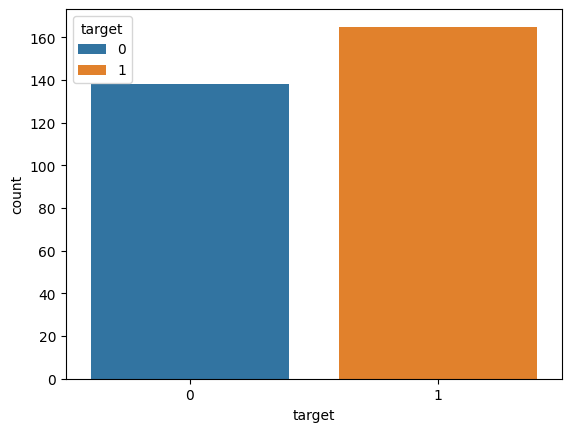

In [11]:
sns.countplot(x=df['target'], hue=df['target'])

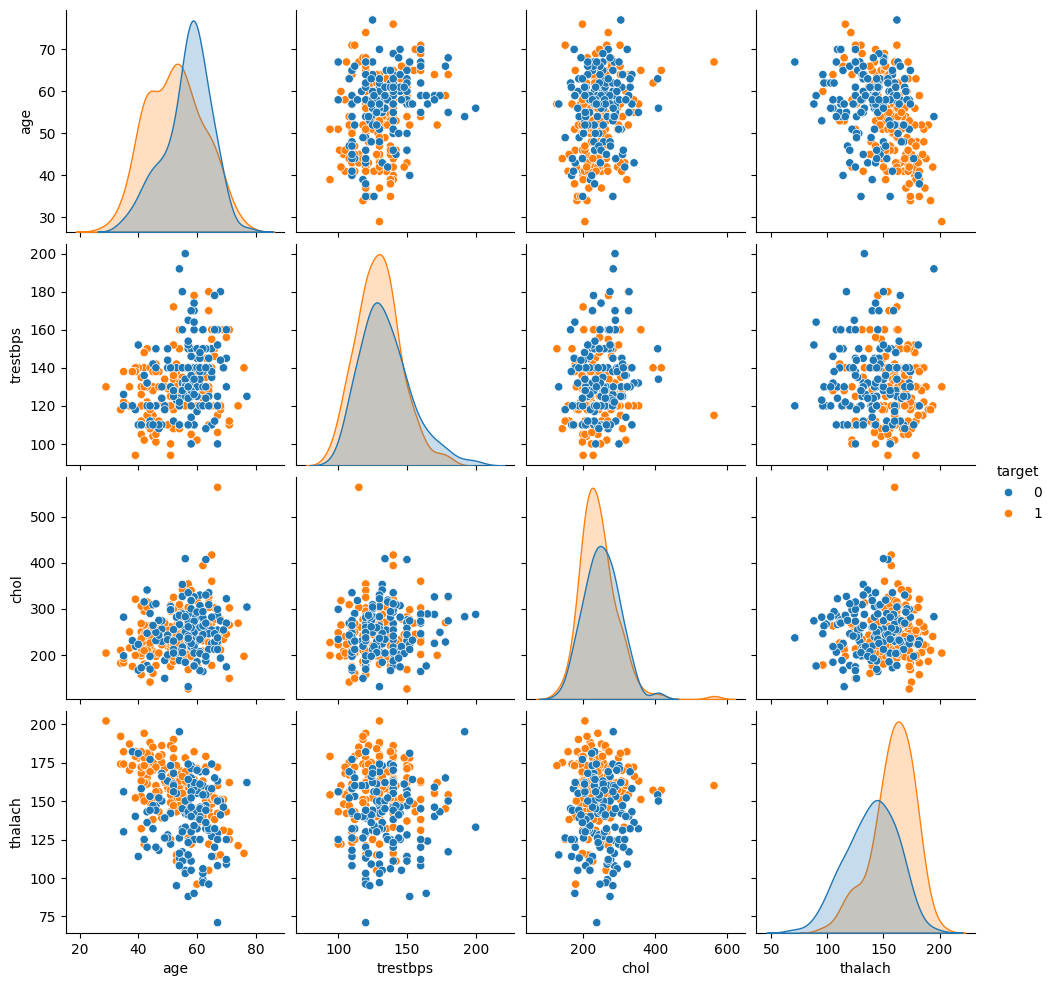

In [15]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')

<Axes: >

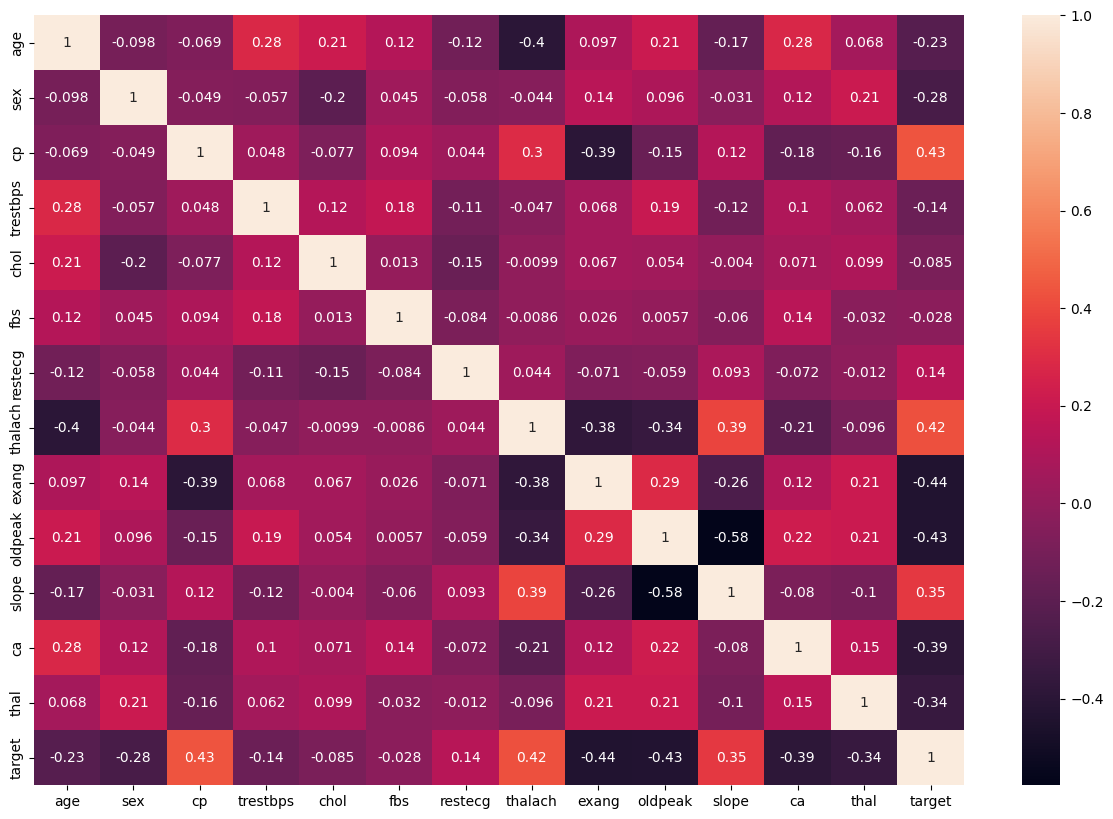

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [29]:
# defining X and y
X = df.drop('target', axis=1)
y = df['target']

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create Model
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV() # automatically checks the parameter, no longer need to use grid
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [31]:
print(log_model.Cs_) # it has checked the algorithm with these Cs.. 
print(log_model.C_) # this is the best one

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
[0.04641589]


In [ ]:
log_model.get_params() # all the parameters this algorithm has...

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [62]:
print(X.columns, len(X.columns))
print(log_model.coef_, len(log_model.coef_[0]))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object') 13
[[-0.09624234 -0.39455733  0.53541263 -0.13845013 -0.0882132   0.02495565
   0.08083019  0.29896895 -0.33440044 -0.35252781  0.25100118 -0.49732614
  -0.37440968]] 13


In [ ]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])
coefs.head()

age        -0.096242
sex        -0.394557
cp          0.535413
trestbps   -0.138450
chol       -0.088213
dtype: float64

/tmp/ipykernel_87103/188575492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index, y=coefs.values, palette='Set2')


<Axes: xlabel='None'>

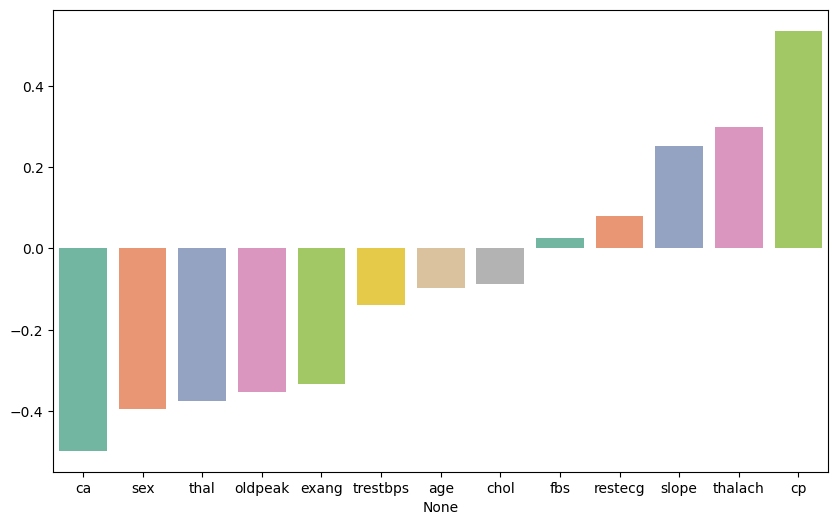

In [48]:
coefs.sort_values(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs.index, y=coefs.values, palette='Set2')

Accuracy is: 0.8064516129032258


/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


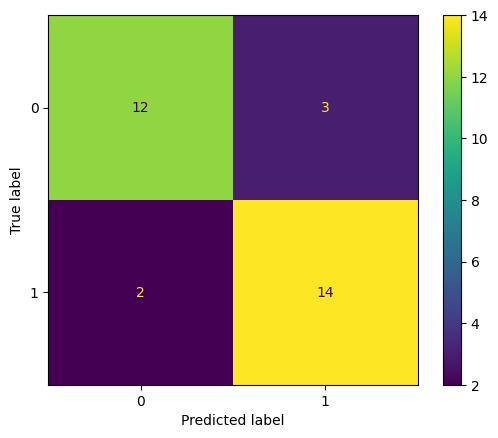

In [50]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

y_pred = log_model.predict(X_test)
print(f'Accuracy is: {accuracy_score(y_test, y_pred)}')
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.92      0.69      0.79        16

    accuracy                           0.81        31
   macro avg       0.83      0.81      0.80        31
weighted avg       0.83      0.81      0.80        31



In [65]:
y_pred2 =log_model.predict_proba(scaled_X_test)
print(y_pred[:3])
print(y_pred2[:3])

[0 1 0]
[[0.97443966 0.02556034]
 [0.25231888 0.74768112]
 [0.35351879 0.64648121]]


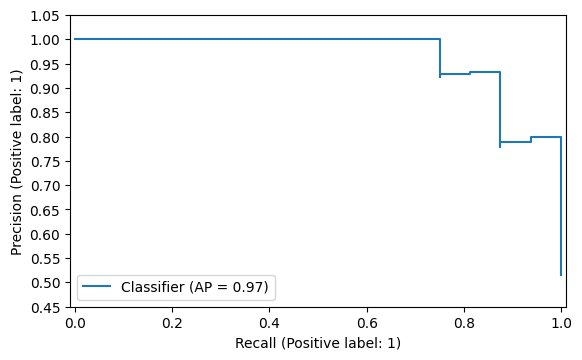

In [73]:
from sklearn.metrics import PrecisionRecallDisplay
y_scores = log_model.predict_proba(scaled_X_test)[:, 1]  # احتمال کلاس 1
PrecisionRecallDisplay.from_predictions(y_test, y_scores)
plt.ylim(0.45, 1.05)
plt.yticks(np.arange(0.45, 1.05, 0.05))
plt.show()
# as precision increases recall decreases (kinda...)

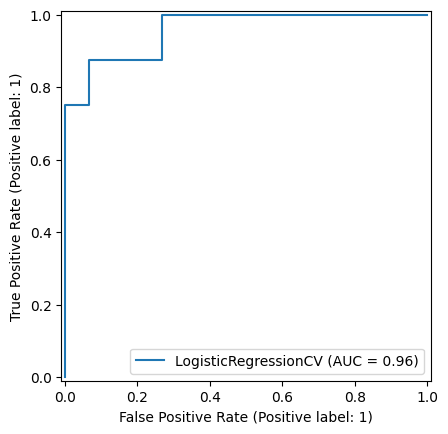

In [56]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.show()
# our ideal in this plot is a 90degree line
# the more its curve sticks to 1 the better our model would be and the more it looks like a straight line the worse our model is